# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [2]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import os

# Load dataset
df = pd.read_csv('fuel_econ.csv')

# Convert to NumPy array (select numerical features only)
X = df.select_dtypes(include=[np.number]).values

# Encode categorical features (if any exist)
df = pd.get_dummies(df, drop_first=True)

# Impute missing values if necessary
df.fillna(df.mean(), inplace=True)


# Compute mean and standard deviation
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# Standardize the data
standardized_data = (X - mean_X) / std_X

# Display first 5 rows
standardized_data[:5]


Saving fuel_econ.csv to fuel_econ.csv


array([[-1.73714048, -1.47583548,  0.28310163,  0.65053594,  1.46709627,
        -1.21737766, -0.85996012, -0.85242986, -1.29062982, -1.39247459,
        -1.00832279,  1.02283829, -0.95057953, -0.94575548],
       [-1.73668367, -1.47583548, -0.78181585, -0.72799833,  1.86476224,
        -1.21737766,  0.00642675, -0.11743408,  0.18494654, -0.03920038,
         0.07186379, -0.29854998,  0.1886082 ,  0.1942578 ],
       [-1.73622685, -1.47583548,  0.28310163,  0.49736547,  1.86476224,
        -1.21737766, -0.69441634, -0.75324472, -0.5920197 , -0.85174957,
        -0.68633929,  0.56793413, -0.38098566, -0.37574884],
       [-1.73577004, -1.47583548,  0.28310163,  0.49736547,  1.86476224,
        -1.21737766, -0.78280029, -0.830286  , -0.82738386, -1.02758796,
        -0.81865124,  0.752062  , -0.38098566, -0.37574884],
       [-1.73531322, -1.47583548, -0.78181585, -0.42165738, -0.62727784,
         0.73489021,  0.47108294,  0.43314691,  0.96751585,  0.99253135,
         0.64805881, -0.72

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [3]:
# Step 3: Calculate the Covariance Matrix

# Compute covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Display the covariance matrix
cov_matrix



array([[ 1.00025458,  0.98591866, -0.06011148, -0.07468488, -0.00657025,
        -0.02195656,  0.09182316,  0.09124849,  0.0906161 ,  0.09538375,
         0.09382686, -0.09974229, -0.1279056 , -0.12235207],
       [ 0.98591866,  1.00025458, -0.05532701, -0.07044161,  0.00623397,
        -0.03365174,  0.06806739,  0.06675938,  0.07330836,  0.07766039,
         0.07201181, -0.0811853 , -0.1498676 , -0.14517775],
       [-0.06011148, -0.05532701,  1.00025458,  0.93411019,  0.24763384,
        -0.00426546, -0.69327904, -0.66619842, -0.76646982, -0.77169964,
        -0.73821112,  0.84848979, -0.78405759, -0.78201448],
       [-0.07468488, -0.07044161,  0.93411019,  1.00025458,  0.2594021 ,
         0.02207729, -0.71366074, -0.6863403 , -0.78418374, -0.78865771,
        -0.75859024,  0.85559254, -0.7936343 , -0.79141752],
       [-0.00657025,  0.00623397,  0.24763384,  0.2594021 ,  1.00025458,
        -0.66581137, -0.27817962, -0.27261515, -0.29688365, -0.29858023,
        -0.29095711,  0.28

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [4]:
# Step 4: Perform Eigendecomposition

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Display the eigenvalues and eigenvectors
eigenvalues, eigenvectors





(array([3.87485886e-04, 2.14358185e-03, 4.24637785e-03, 9.24627112e-03,
        1.36962433e-02, 3.23528963e-02, 6.40205207e-02, 1.25550471e-01,
        1.61017548e-01, 3.01684118e-01, 6.70587666e-01, 1.59364217e+00,
        2.06777956e+00, 8.95720924e+00]),
 array([[ 6.07618642e-04,  7.10578367e-03, -2.10633586e-02,
          6.83326435e-02,  6.95538857e-01, -1.15143583e-01,
         -4.01097554e-03,  1.14861126e-01, -7.02789695e-02,
          1.42115022e-02,  1.83729680e-02,  7.65365183e-02,
         -6.87675276e-01, -1.89952516e-02],
        [-3.98397374e-03,  3.26885432e-04,  9.48384475e-03,
         -5.58369479e-02, -7.10425085e-01, -5.48830131e-02,
          7.51768613e-03,  8.53170135e-02, -3.37955333e-02,
          1.35600088e-02, -9.43831862e-03,  6.88439505e-02,
         -6.89503292e-01, -1.24694065e-02],
        [-8.90395340e-04, -8.04028190e-03, -1.60174402e-02,
         -1.99493288e-02, -2.20121563e-03,  1.19688616e-01,
          6.79764243e-01,  2.53817629e-01,  7.09369930

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [7]:
# Step 5: Sort Principal Components
# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues and eigenvectors accordingly
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display sorted eigenvectors
sorted_eigenvectors


array([[-1.89952516e-02, -6.87675276e-01,  7.65365183e-02,
         1.83729680e-02,  1.42115022e-02, -7.02789695e-02,
         1.14861126e-01, -4.01097554e-03, -1.15143583e-01,
         6.95538857e-01,  6.83326435e-02, -2.10633586e-02,
         7.10578367e-03,  6.07618642e-04],
       [-1.24694065e-02, -6.89503292e-01,  6.88439505e-02,
        -9.43831862e-03,  1.35600088e-02, -3.37955333e-02,
         8.53170135e-02,  7.51768613e-03, -5.48830131e-02,
        -7.10425085e-01, -5.58369479e-02,  9.48384475e-03,
         3.26885432e-04, -3.98397374e-03],
       [ 2.81632694e-01,  1.98550575e-02,  5.61398643e-02,
         6.00933196e-01, -9.71151716e-02,  7.09369930e-02,
         2.53817629e-01,  6.79764243e-01,  1.19688616e-01,
        -2.20121563e-03, -1.99493288e-02, -1.60174402e-02,
        -8.04028190e-03, -8.90395340e-04],
       [ 2.86142593e-01,  3.10582044e-02,  6.39803619e-02,
         5.69008152e-01,  1.12579685e-02, -5.20085469e-04,
         2.41804525e-01, -7.26076226e-01,  5.

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [10]:
# Step 6: Project Data onto Principal Components
# Choose the number of principal components to keep (e.g., retain 95% variance)
num_components = np.argmax(np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues) >= 0.95) + 1

# Select the top principal components
top_eigenvectors = sorted_eigenvectors[:, :num_components]

# Project data onto the selected principal components
reduced_data = np.dot(standardized_data, top_eigenvectors)

# Display the first 5 rows of reduced data
reduced_data[:5]


array([[ 3.19146207,  1.98769416, -1.85142805, -0.4113301 , -0.02013054],
       [-0.38752701,  1.99194578, -2.47970321, -0.76209084,  0.6117137 ],
       [ 2.09148498,  2.03743394, -2.20581408, -0.16628378,  0.41989764],
       [ 2.37914076,  2.06380156, -2.1895205 , -0.27748509,  0.39136747],
       [-2.5972681 ,  2.50420206,  0.47499721, -0.09058357,  0.30389721]])

In [11]:
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)


# Print explained variance for each component
print(f"Explained Variance Ratios: {explained_variance_ratio[:num_components]}")
print(f"Cumulative Variance: {np.cumsum(explained_variance_ratio)[:num_components]}")
print(f"Number of Principal Components selected: {num_components}")

# Explain decision-making
print("We selected", num_components, "principal components because they retain at least 95% of the variance.")

Explained Variance Ratios: [0.63963782 0.14766095 0.11380261 0.04788693 0.02154338]
Cumulative Variance: [0.63963782 0.78729877 0.90110138 0.94898831 0.97053169]
Number of Principal Components selected: 5
We selected 5 principal components because they retain at least 95% of the variance.


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [12]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 5)


array([[ 3.19146207,  1.98769416, -1.85142805, -0.4113301 , -0.02013054],
       [-0.38752701,  1.99194578, -2.47970321, -0.76209084,  0.6117137 ],
       [ 2.09148498,  2.03743394, -2.20581408, -0.16628378,  0.41989764],
       [ 2.37914076,  2.06380156, -2.1895205 , -0.27748509,  0.39136747],
       [-2.5972681 ,  2.50420206,  0.47499721, -0.09058357,  0.30389721]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

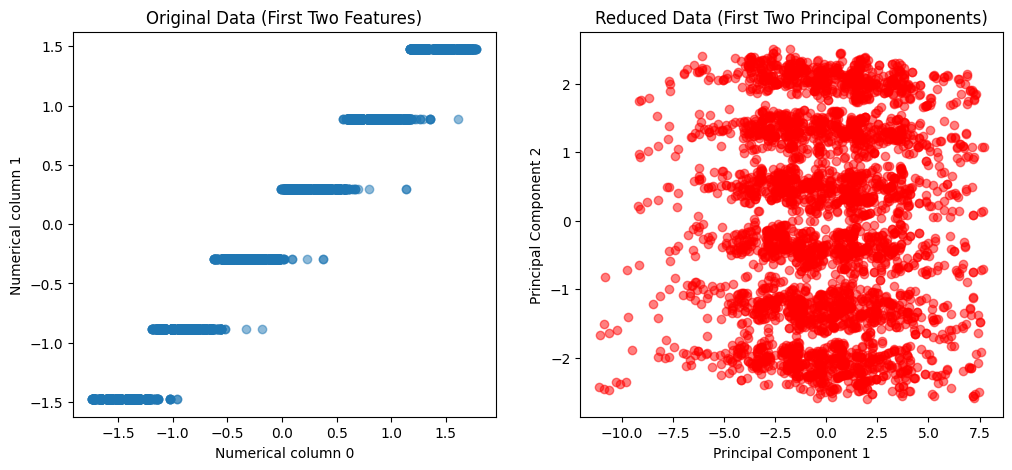

PCA reduces dimensionality while preserving variance.
The original data may have correlations, whereas PCA transforms it into uncorrelated components.
The first principal component captures the most variance, while the second captures the next most.


In [17]:
import matplotlib.pyplot as plt

# Plot original data (using first two features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5)
plt.xlabel("Numerical column 0")
plt.ylabel("Numerical column 1")
plt.title("Original Data (First Two Features)")

# Plot reduced data after PCA (first two principal components)
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, color='red')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Reduced Data (First Two Principal Components)")

plt.show()

# Explanation
print("PCA reduces dimensionality while preserving variance.")
print("The original data may have correlations, whereas PCA transforms it into uncorrelated components.")
print("The first principal component captures the most variance, while the second captures the next most.")
